In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random

In [224]:
df=pd.read_csv('googleplaystore.csv')

In [225]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


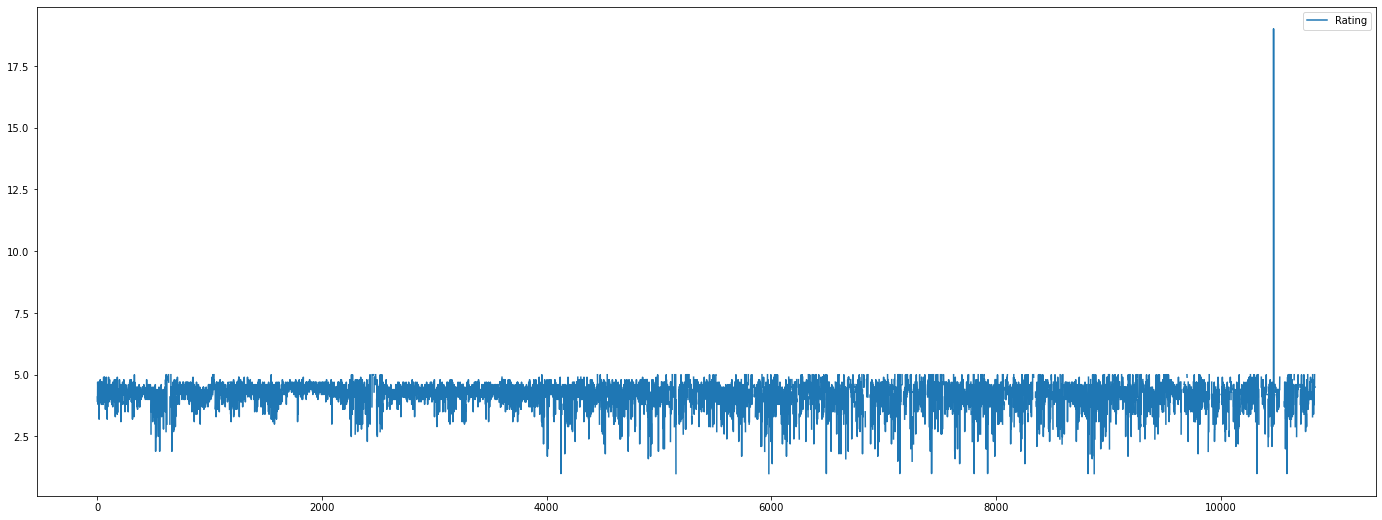

In [227]:
df.plot(figsize=(24,9))

In [228]:
df.dropna(inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [230]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [231]:
CategoryStr=df["Category"]
Categoryvalue=df["Category"].unique()
Categorycount=len(Categoryvalue)
Categorydict={}
for i in range(0,Categorycount):
    Categorydict[Categoryvalue[i]]=i
df["Category score"]=df["Category"].map(Categorydict).astype(int)

In [232]:
Categoryvalue

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [233]:
Categorycount

33

In [234]:
df["Category score"]

0         0
1         0
2         0
3         0
4         0
         ..
10834    18
10836    18
10837    18
10839     3
10840    16
Name: Category score, Length: 9360, dtype: int32

In [235]:

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)
        

In [236]:
df["Size"].fillna(method= "ffill",inplace=True)

In [237]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,18
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,18
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,18
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600000.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,3


In [238]:
for i in df['Installs']:
    df['Installs']=int(i[:-1].replace(',',''))

In [239]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,10000000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,10000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,10000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10000000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [240]:
def type_change(Type):
    if Type=='Free':
        return 0
    else:
        return 1
df['Type']=df['Type'].map(type_change)    
    

In [241]:
Ratings=df['Content Rating'].unique()
Rating_dict={}
for i in range(len(Ratings)):
    Rating_dict[Ratings[i]]=i;
df['Content Rating']=df['Content Rating'].map(Rating_dict).astype(int)

In [242]:
Ratings

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [243]:
Rating_dict

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

In [244]:
len(Ratings)

6

In [245]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [246]:
Genres_unique=df['Genres'].unique()
Genres_dict={}
for i in range(len(Genres_unique)):
    Genres_dict[Genres_unique[i]]=i
df['Genres_new']=df['Genres'].map(Genres_dict).astype(int)

In [258]:
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [259]:
df['Reviews'] = df['Reviews'].astype(int)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int32  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int32  
 8   Genres          9360 non-null   object 
 9   Category score  9360 non-null   int32  
 10  Genres_new      9360 non-null   int32  
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 731.2+ KB


In [261]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category score,Genres_new
0,ART_AND_DESIGN,4.1,159,19000000.0,10000000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,10000000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,10000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,10000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,10000000,0,0.0,0,Art & Design;Creativity,0,2


In [262]:
new_df=pd.get_dummies(df,columns=['Category'])

In [263]:
new_df

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category score,Genres_new,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,10000000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,10000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,10000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,10000000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2600000.0,10000000,0,0.0,0,Education,18,12,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38,53000000.0,10000000,0,0.0,0,Education,18,12,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4,3600000.0,10000000,0,0.0,0,Education,18,12,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114,3600000.0,10000000,0,0.0,3,Books & Reference,3,5,...,0,0,0,0,0,0,0,0,0,0


In [264]:
def Evaluation_matrix(y_true,y_predict):
    print('Mean squared error:'+str(metrics.mean_squared_error(y_true,y_predict)))
    print('Mean absolute error:'+str(metrics.mean_absolute_error(y_true,y_predict)))
    print('Mean squared log error:'+str(metrics.mean_squared_log_error(y_true,yy_predict)))

In [265]:
def Evaluation_matrix_dict(y_true,y_predict,name='Linear - Integer'):
    Ev_matrix={}
    Ev_matrix['name']='Linear - Integer'
    Ev_matrix['Mean squared error']=metrics.mean_squared_error(y_true,y_predict)
    Ev_matrix['Mean absolute error']=metrics.mean_absolute_error(y_true,y_predict)
    Ev_matrix['Mean squared log error']=metrics.mean_squared_log_error(y_true,y_predict)
    return Ev_matrix

In [266]:
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_new'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [275]:
#dummy encoding
from sklearn.model_selection import train_test_split
X_d = new_df.drop(labels = ['Rating','Genres','Genres_new','Category score'],axis=1)
y_d=new_df.Rating
X_d_train,X_d_test,y_d_train,y_d_test = train_test_split(X_d,y_d,test_size=.30)
model=LinearRegression()
model.fit(X_d_train,y_d_train)
Results_d=model.predict(X_d_test)

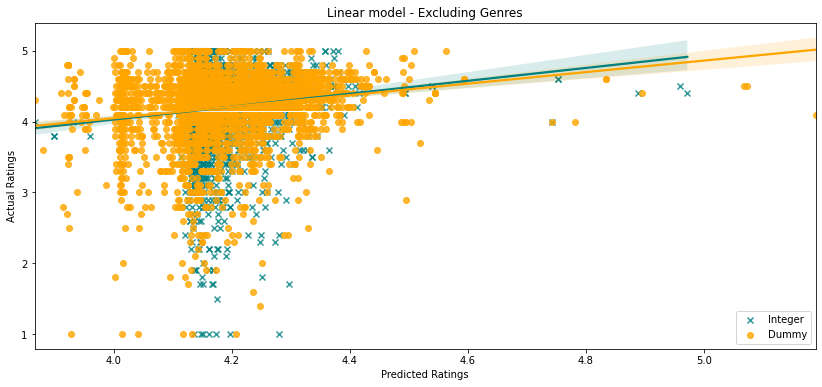

In [276]:
plt.figure(figsize=(14,6))
sns.regplot(Results,y_test,color='teal',label='Integer',marker='x')
sns.regplot(Results_d,y_d_test,color='orange',label='Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()


In [277]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837612
Integer encoding(mean) :4.186399404536398
Dummy encoding(mean) :4.189658019555545
Integer encoding(std) :0.06224414223292086
Dummy encoding(std) :0.11049827604214774
